# __KREDİ ODAKLI MÜŞTERİ TAHMİNİ__
## _KEŞİFSEL VERİ ANALİZİ & SINIFLANDIRMA_

### 1. Giriş

Bankacılık sektöründe, müşterilerine kredi sağlayabilmek için kişinin demografisine bakması gerekmektedir. Bu inceleme bankanın sürekliliğini sağlayabilmesi için stratejilerini oldukça iyi optimize etmesini öngörebilir. Kredi talep eden müşterinin geçmişini anlamlandırarak ve hızlı bir şekilde kredi alıp alamayacağına karar verebilir veya kampanya için müşteri kitlesi segmente edilebilir. Banka, müşteri veri tabanında yer alan demografi sayesinde, müşterilerin iyi veya kötü olarak nitelendirmesine ve gelecek için hedef bir müşteri profili oluşturmasını sağlayacaktır.

Veriler, SAS kütüphanesinde Home Equity Data Seti olarak yer almaktadır. Veri setinde, müşterilerin meslekleri, kredi geçmişleri, kredi sebepleri, malvarlığı gibi öznitelikerini içeren 3576 örnek ve 13 değişken vardır. Hedef değişkeni olan 'Bad', müşterini iyi veya kötü davranış sergilediğini öngörmektedir.


> - Bad      : 1 = customer defaulted on the loan or is seriously delinquent 0 = customer is current on loan payments
> - CLAge    : Age of oldest credit line in months                                                                   
> - CLNo     : Number of credit lines                                                                                
> - DebtInc  : Debt-to-income ratio                                                                                  
> - Delinq   : Number of delinquent credit lines                                                                     
> - Derog    : Number of major derogatory reports                                                                    
> - Job      : Occupational category                                                                                 
> - Loan     : Requested loan amount                                                                                 
> - MortDue  : Amount due on existing mortgage                                                                       
> - nInq     : Number of recent credit inquiries                                                                     
> - Reason   : DebtCon = debt consolidation HomeImp = home improvement                                               
> - Value    : Value of current property                                                                             
> - YoJ      : Years at present job   

Style görünümü için [nbviewer](https://nbviewer.jupyter.org/github/Kodluyoruz-Ankara-Veri-Bilimi/muratacikgoz/blob/master/2_hmelq.ipynb) üzerinden inceleyin!

### 2. Veri Derlenmesi

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

import allinone as aio  #foksiyonların yer aldığı kütüphane

%matplotlib inline
warnings.filterwarnings('ignore')
pd.set_option("display.float_format", "{:.3f}".format)
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('hmelq.csv')
df.bad.replace(0, 'no', inplace = True)
df.bad.replace(1, 'yes', inplace = True)

In [3]:
df.head(3)

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,no,81200,18834.000,108355.000,HomeImp,NaN,28.000,0.000,0.000,139.140,0.000,14.000,34.042
1,no,12600,103960.000,127384.000,DebtCon,NaN,2.000,0.000,0.000,129.020,0.000,25.000,34.479
2,no,18000,46865.000,61266.000,DebtCon,NaN,5.000,0.000,0.000,102.590,2.000,9.000,26.354


### 3. Veri Keşfi

#### 3.1 Önbilgiler

In [4]:
aio.describe(df)

,dtype,count,mean,std,min,median,max,null,zero,unique,freq,top,upout,lowout
bad,object,3576,NaN,NaN,NaN,NaN,NaN,0,0.000%,2,2863,no,NaN,NaN
loan,int64,3576,18529.698,11262.834,1100,16200.000,89900,0,0.000%,474,65,15000,4.334%,0.000%
mortdue,float64,3262,74013.908,44016.834,2619.000,65858.000,399550.000,314,0.000%,3095,6,50000.000,3.747%,0.000%
value,float64,3512,101076.923,54865.275,8800.000,89183.000,850000.000,64,0.000%,3302,9,80000.000,5.537%,0.000%
reason,object,3429,NaN,NaN,NaN,NaN,NaN,147,0.000%,2,2371,DebtCon,NaN,NaN
job,object,3409,NaN,NaN,NaN,NaN,NaN,167,0.000%,6,1431,Other,NaN,NaN
yoj,float64,3264,8.833,7.568,0.000,7.000,41.000,312,6.907%,86,247,0.000,1.370%,0.000%
derog,float64,3149,0.262,0.865,0.000,0.000,10.000,427,75.671%,11,2706,0.000,12.388%,0.000%
delinq,float64,3225,0.433,1.099,0.000,0.000,15.000,351,70.386%,12,2517,0.000,19.799%,0.000%
clage,float64,3397,179.833,87.066,0.490,173.640,1168.230,179,0.000%,3050,7,102.500,0.951%,0.000%


#### 3.2 Null Grafiği

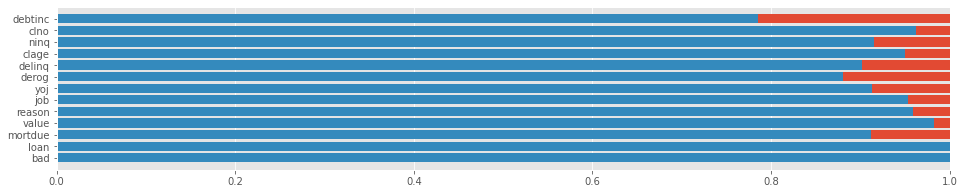

In [5]:
plt.figure(figsize=(16,3))
aio.nullbar(df)

- En çok null değer debtinc kolonunda görünüyor, sayısal değerlere oranla object null değerler azınlıkta kalıyor.
- Hedef değişkeninde ve istenen loan miktarında null değer bulunmamaktadır.

#### 3.3 Uniq Değerler

In [6]:
aio.unique(df)

bad : ['no' 'yes']
--------------------------------------------------------------------------------
reason : ['HomeImp' 'DebtCon' nan]
--------------------------------------------------------------------------------
job : [nan 'Mgr' 'Office' 'Other' 'ProfEx' 'Sales' 'Self']
--------------------------------------------------------------------------------
yoj : [28.    2.    5.   19.   17.    4.   26.   16.   14.   25.    3.    8.
  6.   10.   15.   18.    7.     nan 27.    3.8   8.5   0.    1.   13.
 11.    9.   21.   12.   20.   29.   22.   23.   30.   24.    2.5   9.9
 31.    0.8   1.5   3.5   0.5   5.5   0.2   0.4  36.   35.    0.1   7.5
  1.9   1.3   0.9  14.4  28.5  10.5   0.3  22.8  12.6   2.3   4.5  33.
  0.6   9.3   3.9   6.6  17.6   1.6  41.    7.2   0.25  2.6  34.    5.6
  9.2   9.5   9.8   6.5   3.2   4.6   2.9  24.5  19.5  17.5   4.3   0.7
  7.4   1.8   2.2 ]
--------------------------------------------------------------------------------
derog : [ 0.  1. nan  2.  3.  4.  6.

- 100 freq altında olan uniq değerler yazdırıldı.

#### 3.4 Korelasyon

In [7]:
df.iloc[:,1:].corr().style.background_gradient(axis=None)

,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
loan,1.000000,0.229546,0.337453,0.123293,-0.001463,-0.021577,0.089030,0.048633,0.092377,0.093636
mortdue,0.229546,1.000000,0.873280,-0.089949,-0.053310,-0.004971,0.141236,0.029452,0.340139,0.167358
value,0.337453,0.873280,1.000000,0.002501,-0.057279,-0.011014,0.182226,-0.005191,0.290439,0.134187
yoj,0.123293,-0.089949,0.002501,1.000000,-0.073500,0.065401,0.184283,-0.067735,0.017809,-0.052290
derog,-0.001463,-0.053310,-0.057279,-0.073500,1.000000,0.234706,-0.083755,0.163750,0.048631,0.032324
delinq,-0.021577,-0.004971,-0.011014,0.065401,0.234706,1.000000,0.044245,0.081166,0.151996,0.076943
clage,0.089030,0.141236,0.182226,0.184283,-0.083755,0.044245,1.000000,-0.113367,0.221071,-0.042852
ninq,0.048633,0.029452,-0.005191,-0.067735,0.163750,0.081166,-0.113367,1.000000,0.097669,0.133751
clno,0.092377,0.340139,0.290439,0.017809,0.048631,0.151996,0.221071,0.097669,1.000000,0.180983
debtinc,0.093636,0.167358,0.134187,-0.052290,0.032324,0.076943,-0.042852,0.133751,0.180983,1.000000


- En yüksek korele mortdue ve value arasında gözlemleniyor.
- Genel tabloya bakılırsa, aralarındaki ilişki oldukça düşük görünüyor. Yoğun renkler malvarlığı ve ipotekte yer almaktadır.

### 3.5 Kayıp Değerler

In [8]:
dfCopy = df.copy()

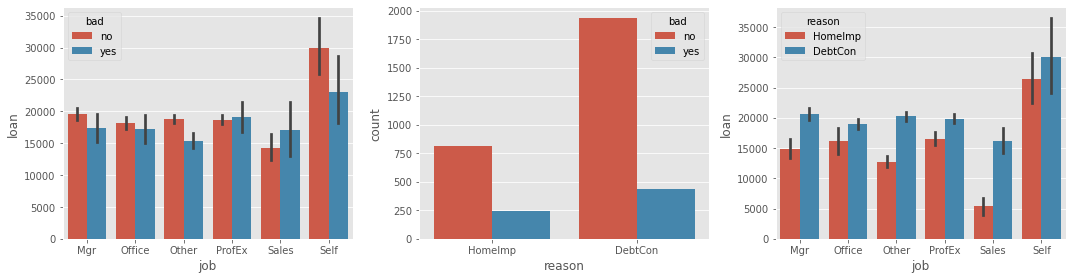

In [9]:
fig, ax = plt.subplots(1, 3, figsize = (15, 4))
sns.barplot(x='job', y='loan', hue='bad', data=dfCopy, ax=ax[0])
sns.countplot('reason', hue='bad', data=dfCopy, ax=ax[1])
sns.barplot(x='job', y='loan', hue='reason', data=dfCopy, ax=ax[2])
plt.tight_layout()

In [10]:
dfCopy['reason'].fillna('DebtCon', inplace = True)
dfCopy['job'].fillna('Other', inplace = True)
dfCopy['derog'].fillna(0, inplace = True)
dfCopy['delinq'].fillna(0, inplace = True)

for col in dfCopy.isnull().sum()[dfCopy.isnull().sum() != 0].index:
    jr_mean = pd.DataFrame(dfCopy.groupby(['job','reason'])[col].mean())
    for j in dfCopy.job.unique():
        for i in dfCopy.reason.unique():
            dfCopy.loc[dfCopy[col].isna() == True, col] = jr_mean.xs((j,i))[0]
            
dfCopy.yoj = dfCopy.yoj.round(1)
dfCopy.clno = dfCopy.clno.round(0)
dfCopy.ninq = dfCopy.ninq.round(0)

- Borç (reason) sebebi nan olanlar, kişisel eğilimde olduğu düşünülüerek DebtCon olarak değiştirildi.
- İş (job) değeri nan olanlar, bilinmediğinden Other olarak değiştirildi.
- Uygunsuz rapor (derog) değeri nan olanlar, hiç raporu olmadığı düşünülerek 0 olarak değiştirildi.
- Geciktirilmiş borç (delinq) değeri nan olanlar, hiç borcu olmadığı varsayılarak 0 olarak değiştirildi.
- Geri kalan nan değerler job ve reason'a göre gruplandırılarak, grup içi ortalama değer ile değiştirildi.
- Son olarak gerekli yuvarlamalar yapıldı.

### 3.6 Kategorik Eğilim

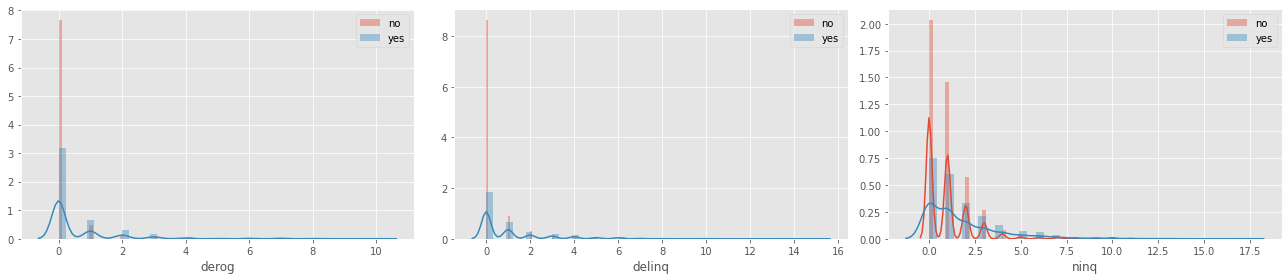

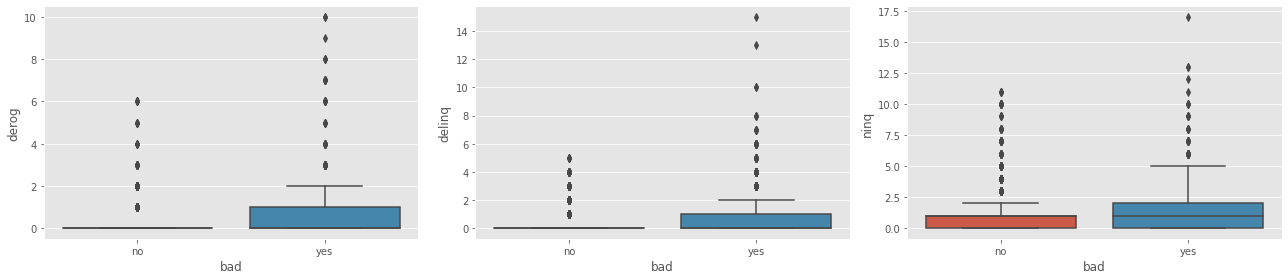

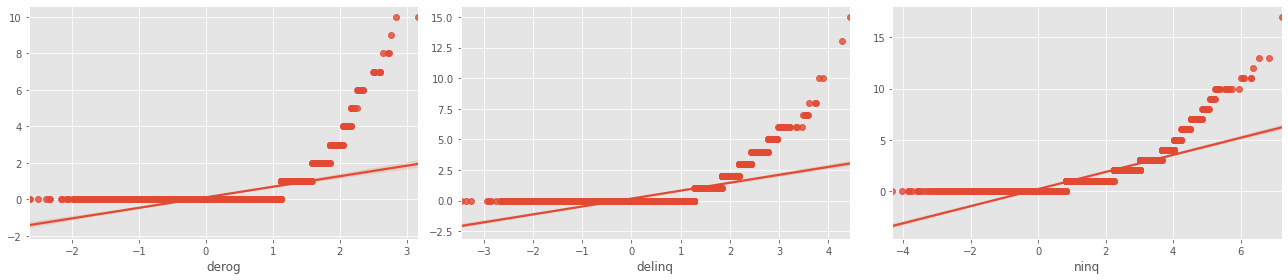

In [11]:
plt.figure(figsize=(18, 4))
for i, col in enumerate(['derog','delinq','ninq'], 1):
    plt.subplot(1, 3, i)
    sns.distplot(dfCopy[col][dfCopy.bad == 'no'], label='no', hist=True)
    sns.distplot(dfCopy[col][dfCopy.bad == 'yes'], label='yes', hist=True)
    plt.tight_layout()
    plt.legend()
    
plt.figure(figsize=(18, 4))
for i, col in enumerate(['derog','delinq','ninq'], 1):
    plt.subplot(1, 3, i)
    sns.boxplot(dfCopy.bad, (dfCopy[col]))
    plt.tight_layout()
    
plt.figure(figsize=(18, 4))
for i, col in enumerate(['derog','delinq','ninq'], 1):
    plt.subplot(1, 3, i)
    randNorm = np.random.normal(np.mean(dfCopy[col]), np.std(dfCopy[col]), len(dfCopy[col]))
    sns.regplot(np.sort(randNorm), np.sort(dfCopy[col]))
    plt.xlabel(f'{col}')
    plt.tight_layout()

In [12]:
aio.describe(dfCopy[['derog','delinq','ninq']])

,dtype,count,mean,std,min,median,max,null,zero,unique,freq,top,upout,lowout
derog,float64,3576,0.230,0.816,0.000,0.000,10.000,0,87.612%,11,3133,0.000,12.388%,0.000%
delinq,float64,3576,0.390,1.052,0.000,0.000,15.000,0,80.201%,12,2868,0.000,19.799%,0.000%
ninq,float64,3576,1.171,1.655,0.000,1.000,17.000,0,42.478%,15,1519,0.000,3.020%,0.000%


In [13]:
def catDerog(col):
    if col == 0:
        return 'dg0'
    if col >= 1 and col < 3:
        return 'dg1'
    if col >= 3:
        return 'dg2'
    
def catDelinq(col):
    if col == 0:
        return 'dl0'
    if col >= 1 and col < 3:
        return 'dl1'
    if col >= 3:
        return 'dl2'
    
def catNinq(col):
    if col == 0:
        return 'nq0'
    if col >= 1 and col < 3:
        return 'nq1'
    if col >= 3 and col < 6:
        return 'nq2'
    if col >= 6:
        return 'nq3'
    
#dfCopy['derog_l'] = dfCopy.apply(lambda dfCopy:catDerog(dfCopy.derog), axis=1)
#dfCopy['delinq_l'] = dfCopy.apply(lambda dfCopy:catDelinq(dfCopy.delinq), axis=1)
#dfCopy['ninq_l'] = dfCopy.apply(lambda dfCopy:catNinq(dfCopy.ninq), axis=1)

In [14]:
pd.crosstab(dfCopy.derog, dfCopy.bad).T
#pd.crosstab(dfCopy.delinq, dfCopy.bad).T
#pd.crosstab(dfCopy.ninq, dfCopy.bad).T

derog,0.000,1.000,2.000,3.000,4.000,5.000,6.000,7.000,8.000,9.000,10.000
bad,,,,,,,,,,,
no,2630,162,49,10,4,4,4,0,0,0,0
yes,503,103,49,25,10,4,6,7,3,1,2


- Grafikler ve tablolar incelendiğinde 3 sütun kategorik eğilim göstermektedir.
- İstatistiksel değerleri incelenerek, eşik değerlerine göre etiketlendi.

In [15]:
print(stats.chi2_contingency(pd.crosstab(dfCopy.bad, dfCopy['derog']))[1])
print(stats.chi2_contingency(pd.crosstab(dfCopy.bad, dfCopy['delinq']))[1])
print(stats.chi2_contingency(pd.crosstab(dfCopy.bad, dfCopy['ninq']))[1])

5.343409704366403e-57
5.536461501549574e-88
1.7222538680109758e-25


- Bu üç değişken için hem kategorik hem de numerik olarak p değerleri incelendiğinde anlamlı sonuç çıktı, ama ordinal bi ilişki olduğundan kaynaklı değişiklik yapılmadı.

### 3.7 Grafikler

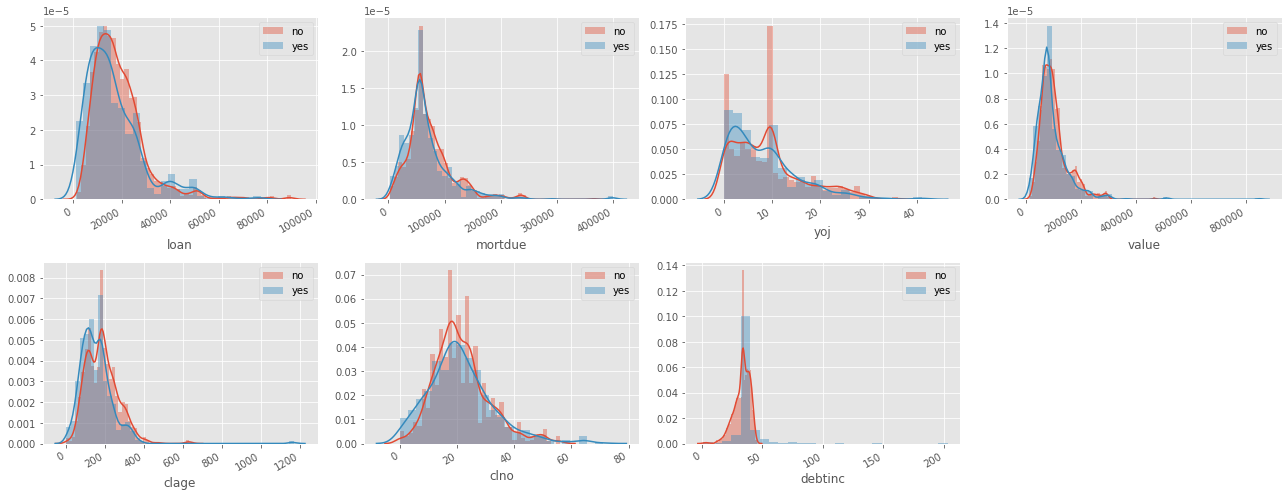

In [16]:
plt.figure(figsize=(18, 7))
for i, col in enumerate(['loan', 'mortdue', 'yoj', 'value', 'clage', 'clno', 'debtinc'], 1):
    plt.subplot(2, 4, i)
    sns.distplot(dfCopy[col][dfCopy.bad == 'no'], label='no', hist=True)
    sns.distplot(dfCopy[col][dfCopy.bad == 'yes'], label='yes', hist=True)
    plt.xticks(rotation=30, ha='right')
    plt.tight_layout()
    plt.legend()

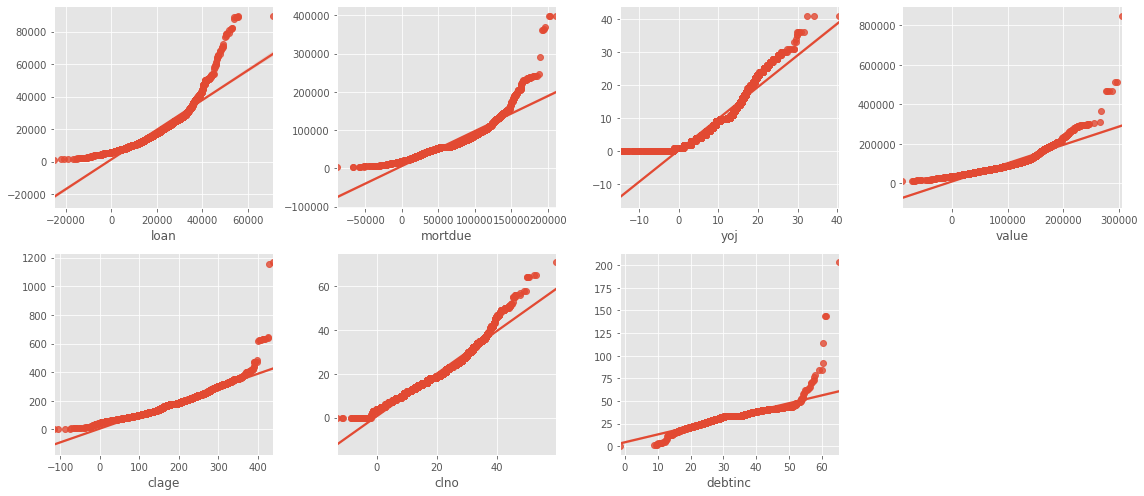

In [17]:
plt.figure(figsize=(16, 7))
for i, col in enumerate(['loan', 'mortdue', 'yoj', 'value', 'clage', 'clno', 'debtinc'], 1):
    plt.subplot(2, 4, i)
    randNorm = np.random.normal(np.mean(dfCopy[col]), np.std(dfCopy[col]), len(dfCopy[col]))
    sns.regplot(np.sort(randNorm), np.sort(dfCopy[col]))
    plt.xlabel(f'{col}')
    #plt.yticks(rotation=60, ha='right')
    plt.tight_layout()

- Bad olan müşterilerin raporları ve geçiktirilmiş borçları olduğu gözlemlendi.
- Borç/gelir oranı kredi alabiliritesi olan müşteriler için dağılım sergilerken, 1 olanlar için dağılım gözlemlenmiyor.
- Normale en yakın görüş, clno değerlerinde, ama p-value incelemek gerekir.
- derog, delinq ve ninq kategorik eğilim göstermektedir.
- Genel olarak bakılırsa, sağa çarpık grafikler gözlemlendi, ama şekil olarak düzgün (normal) oldukları söylenebilir.  

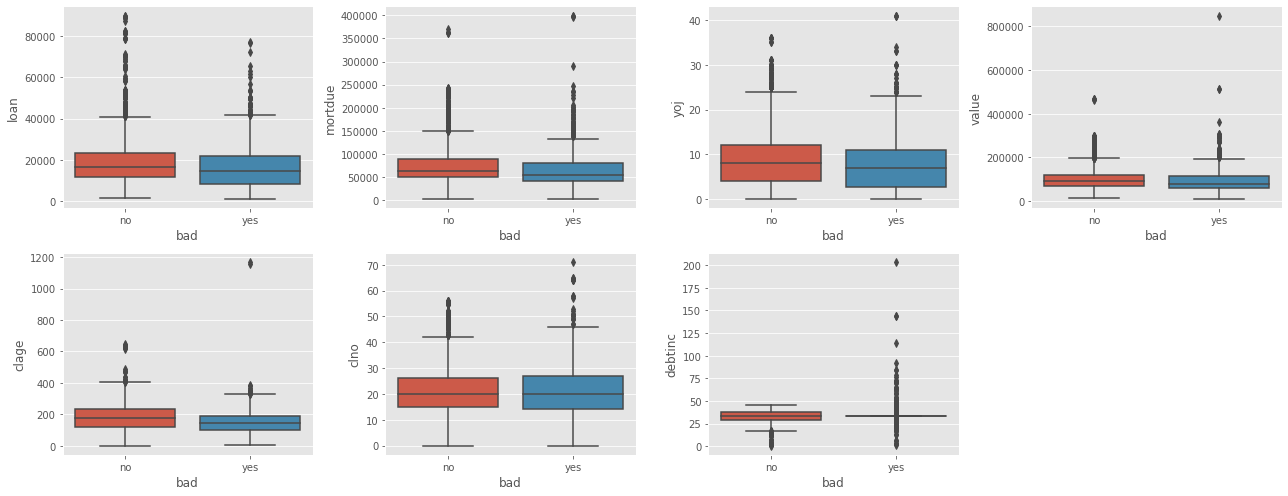

In [18]:
plt.figure(figsize=(18, 7))
for i, col in enumerate(['loan', 'mortdue', 'yoj', 'value', 'clage', 'clno', 'debtinc'], 1):
    plt.subplot(2, 4, i)
    sns.boxplot(dfCopy.bad, (dfCopy[col]))
    plt.tight_layout()

- Yoğun olarak aykırı değer gözlenmektedir, qqplot grfiklerinden de görülmekteydi.
- Hedef değişkene göre clno, mortdue ve value benzer varyansa sahiptir.

#### ? yoj ve clno

In [19]:
pd.crosstab(dfCopy[dfCopy.yoj == 0].bad, dfCopy[dfCopy.yoj == 0].job)

job,Mgr,Office,Other,ProfEx,Sales,Self
bad,,,,,,
no,17,47,106,38,4,1
yes,5,2,23,3,1,0


In [20]:
aio.describe(dfCopy[(dfCopy.yoj == 0) & (dfCopy.bad == 'yes')][['mortdue','value']])

,dtype,count,mean,std,min,median,max,null,zero,unique,freq,top,upout,lowout
mortdue,float64,34,66807.011,46407.822,14000.000,55528.045,247500.000,0,0.000%,27,8,55528.045,11.765%,0.000%
value,float64,34,76289.510,45390.258,11702.000,72997.166,190797.000,0,0.000%,31,4,77000.332,11.765%,0.000%


- yoj ve clno için 0 olan değerler var. Bu müşterilerin kayıtları bulunmayabilir.
- İş tecrübesi olmayan müşterilerin azınlığına kredi verilmiş.
- İş tecrübesi olmayan 34 kişi kredi alabilmiş, teminat olarak mal varlıkları düşünüldüğü için 0.1 değiştirmesi yapılmadı.

In [21]:
dfCopy[dfCopy.yoj == 0].job.value_counts()

Other     129
Office     49
ProfEx     41
Mgr        22
Sales       5
Self        1
Name: job, dtype: int64

In [22]:
dfCopy.loc[dfCopy.clage > 1000,'clage'] = dfCopy[(dfCopy.bad == 'yes') & (dfCopy.clage < 1000)].clage.max()

- En eski kredi kredi üzerinden geçen zaman (clage) sorgulandığında 100 yıllık değerler gözlemlendi, harici max değerler ile değiştirildi.

### 3.8 Anlamlılık Testleri

#### 3.8.1 p-Value

In [23]:
p_value = pd.DataFrame()
for col in dfCopy.columns[1:]:
    p_value.loc[col,'dtype'] = dfCopy[col].dtypes
    if dfCopy[col].dtypes != object:
        p_value.loc[col,'shapiro'] = (stats.shapiro((dfCopy[col]))[1])
        p_value.loc[col,'levene'] = (stats.levene(dfCopy[col][dfCopy.bad == 'no'], dfCopy[col][dfCopy.bad == 'yes'])[1])
        
        if (stats.levene(dfCopy[col][dfCopy.bad == 'no'], dfCopy[col][dfCopy.bad == 'yes'])[1]) > 0.05:
            p_value.loc[col,'ttest_ind'] = (stats.ttest_ind(dfCopy[col][dfCopy.bad == 'no'], dfCopy[col][dfCopy.bad == 'yes'],equal_var=True)[1])
        else:
            p_value.loc[col,'ttest_ind'] = (stats.ttest_ind(dfCopy[col][dfCopy.bad == 'no'], dfCopy[col][dfCopy.bad == 'yes'],equal_var=False)[1])
            
    elif dfCopy[col].dtypes == object:
        p_value.loc[col,'chi2'] = (stats.chi2_contingency(pd.crosstab(dfCopy.bad, dfCopy[col]))[1])

In [24]:
def color_negative(val):
    color = 'red' if val > 0.05 else 'black'
    return 'color: %s' % color
p_value.style.applymap(color_negative, subset=['shapiro','levene','ttest_ind','chi2'])

,dtype,shapiro,levene,ttest_ind,chi2
loan,int64,0.000000,0.011830,0.000047,nan
mortdue,float64,0.000000,0.931290,0.001051,nan
value,float64,0.000000,0.594313,0.000162,nan
reason,object,nan,nan,nan,0.002837
job,object,nan,nan,nan,0.000000
yoj,float64,0.000000,0.567084,0.001905,nan
derog,float64,0.000000,0.000000,0.000000,nan
delinq,float64,0.000000,0.000000,0.000000,nan
clage,float64,0.000000,0.024948,0.000000,nan
ninq,float64,0.000000,0.000000,0.000000,nan


Hedef değişkene göre;
- Shapiro testi için hiçbiri normal dağılım sergilemiyor.
- Levene testi için kırmızı olanlar aynı varyansa sahip değerlerdir. >0.05
- Bağımsız ttesti için clno ile anlamlı bir farklılık yoktur, kredi onayı diğer değerler için anlamlı-belirleyici bulunuyor.
- Kategorik değişkenler için de anlamlı farklılık gözlemlendi.

#### 3.8.2 ttest

In [25]:
def ttest_value(df):
    dfNum = df.select_dtypes(exclude=['object'])
    dfttest = pd.DataFrame()
    for idx in dfNum.columns[1:]:
        for col in dfNum.columns[1:]:
            if (stats.levene(dfNum[idx][dfCopy.bad == 'no'], dfNum[col][dfCopy.bad == 'yes'])[1]) > 0.05:
                stat, p = stats.ttest_ind(dfNum[idx][dfCopy.bad == 'no'], dfNum[col][dfCopy.bad == 'yes'],equal_var=True)
                dfttest.loc[idx+str('_no'), col+str('_yes')] = p
            else:
                stat, p = stats.ttest_ind(dfNum[idx][dfCopy.bad == 'no'], dfNum[col][dfCopy.bad == 'yes'],equal_var=False)
                dfttest.loc[idx+str('_no'), col+str('_yes')] = p              
    return dfttest

ttest_value(dfCopy).style.applymap(color_negative)

,mortdue_yes,value_yes,yoj_yes,derog_yes,delinq_yes,clage_yes,ninq_yes,clno_yes,debtinc_yes
mortdue_no,0.001051,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
value_no,0.000000,0.000162,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
yoj_no,0.000000,0.000000,0.001905,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
derog_no,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
delinq_no,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
clage_no,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ninq_no,0.000000,0.000000,0.000000,0.000000,0.324061,0.000000,0.000000,0.000000,0.000000
clno_no,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.605163,0.000000
debtinc_no,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


#### 3.8.3 levene

In [26]:
def levene_value(df):
    dfNum = df.select_dtypes(exclude=['object'])
    dflev = pd.DataFrame()
    for idx in dfNum.columns[1:]:
        for col in dfNum.columns[1:]:
            stat, p = stats.levene(dfNum[idx][dfCopy.bad == 'no'], dfNum[col][dfCopy.bad == 'yes'])
            dflev.loc[idx+str('_no'), col+str('_yes')] = p
    return dflev

levene_value(dfCopy).style.applymap(color_negative)

,mortdue_yes,value_yes,yoj_yes,derog_yes,delinq_yes,clage_yes,ninq_yes,clno_yes,debtinc_yes
mortdue_no,0.931290,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
value_no,0.000001,0.594313,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
yoj_no,0.000000,0.000000,0.567084,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
derog_no,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
delinq_no,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
clage_no,0.000000,0.000000,0.000000,0.000000,0.000000,0.024948,0.000000,0.000000,0.000000
ninq_no,0.000000,0.000000,0.000000,0.000000,0.001140,0.000000,0.000000,0.000000,0.000000
clno_no,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000004,0.000000
debtinc_no,0.000000,0.000000,0.010772,0.000000,0.000000,0.000000,0.000000,0.000000,0.000045


### 3.9 Normal Dönüşümleri

- Normal şekil göstermeyenler için incelenmiştir.

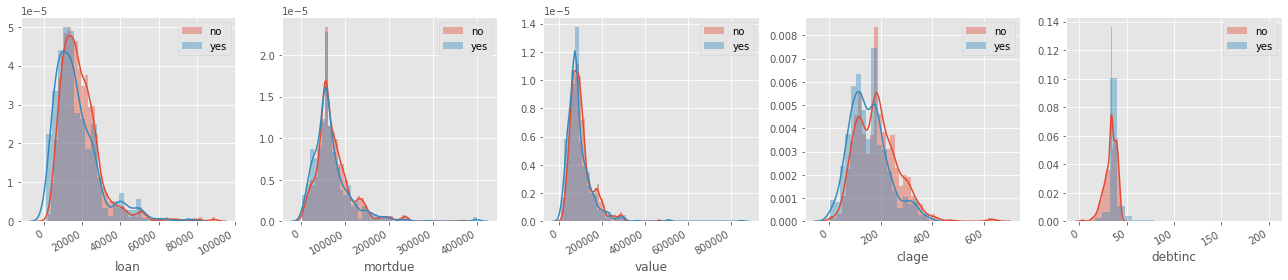

In [27]:
plt.figure(figsize=(18, 4))
for i, col in enumerate(['loan', 'mortdue', 'value', 'clage', 'debtinc'], 1):
    plt.subplot(1, 5, i)
    sns.distplot((dfCopy[col][dfCopy.bad == 'no']), label='no', hist=True)
    sns.distplot((dfCopy[col][dfCopy.bad == 'yes']), label='yes', hist=True)
    plt.xticks(rotation=30, ha='right')
    plt.tight_layout()
    plt.legend()

#### sqrt

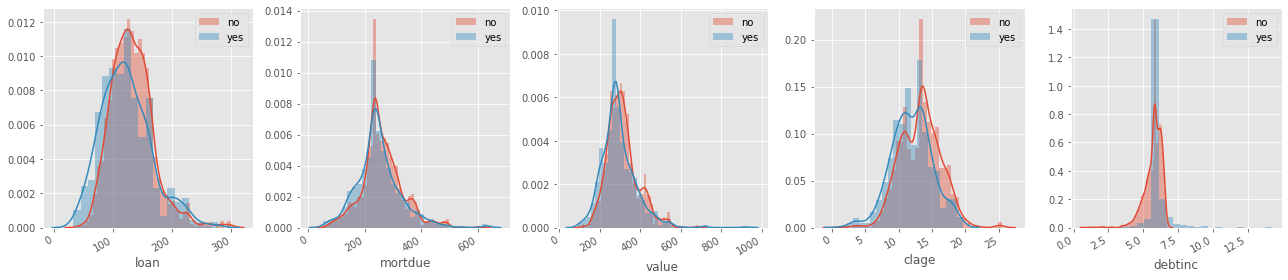

In [28]:
plt.figure(figsize=(18, 4))
for i, col in enumerate(['loan', 'mortdue', 'value', 'clage', 'debtinc'], 1):
    plt.subplot(1, 5, i)
    sns.distplot(np.sqrt(dfCopy[col][dfCopy.bad == 'no']), label='no', hist=True)
    sns.distplot(np.sqrt(dfCopy[col][dfCopy.bad == 'yes']), label='yes', hist=True)
    plt.xticks(rotation=30, ha='right')
    plt.tight_layout()
    plt.legend()

#### log

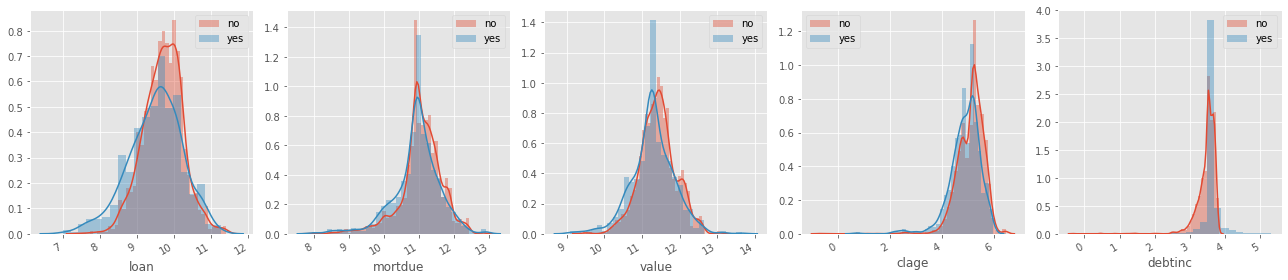

In [29]:
plt.figure(figsize=(18, 4))
for i, col in enumerate(['loan', 'mortdue', 'value', 'clage', 'debtinc'], 1):
    plt.subplot(1, 5, i)
    sns.distplot(np.log(dfCopy[col][dfCopy.bad == 'no']), label='no', hist=True)
    sns.distplot(np.log(dfCopy[col][dfCopy.bad == 'yes']), label='yes', hist=True)
    plt.xticks(rotation=30, ha='right')
    plt.tight_layout()
    plt.legend()

#### boxcox

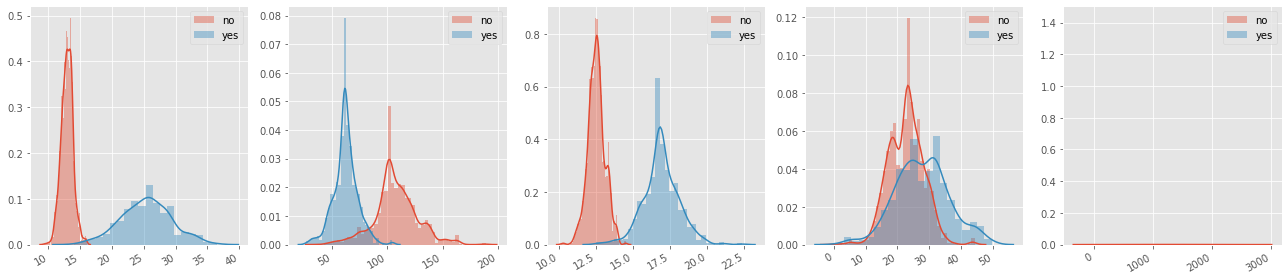

In [30]:
plt.figure(figsize=(18, 4))
for i, col in enumerate(['loan', 'mortdue', 'value', 'clage', 'debtinc'], 1):
    plt.subplot(1, 5, i)
    sns.distplot(stats.boxcox(dfCopy[col][dfCopy.bad == 'no'])[0], label='no', hist=True)
    sns.distplot(stats.boxcox(dfCopy[col][dfCopy.bad == 'yes'])[0], label='yes', hist=True)
    plt.xticks(rotation=30, ha='right')
    plt.tight_layout()
    plt.legend()

In [31]:
dfBox = dfCopy.copy()
for col in ['loan', 'mortdue', 'value', 'clage', 'debtinc']:
    dfBox[col] = (stats.boxcox(dfBox[col])[0])

- Histogram grafiklerinden çarpıklığı yoğun olarak görmekteyiz.
- Aykırı değerleri dönüşüm yaparak manipule edebiliriz. Model için dönüşümsüz hali kullanılmıştır.

In [32]:
dfBox.head(3)

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,no,30.264,65.350,16.924,HomeImp,Other,28.000,0.000,0.000,22.039,0.000,14.000,13.321
1,no,21.146,113.382,17.257,DebtCon,Other,2.000,0.000,0.000,21.139,0.000,25.000,13.443
2,no,22.697,87.807,15.780,DebtCon,Other,5.000,0.000,0.000,18.607,2.000,9.000,11.077


> ## Keşifsel Sonuçlar
> - Veriye ilk gözatıldığında her değişken için nan değerler bulunuyordu. Bunlar drop edilirse yaklaşık %30'luk veri kaybı yaşanıyordu. Kayıp değerler en optimize şekilde dolduruldu. 
> - İlişki tabloları incelendiğinde çok yüksek korelesyon gösteren değişkenler bulunmamaktaydı, PCA birleştirmelerine ihtiyaç duyulmadı.
> - Kategorik eğilim gösterdiğini düşündüğümüz değişkenler incelendi, ama sıralı ilişki belirtikleri için etiketleme yapılmadı.
> - Değişkenler aykırı değerlerden kaynaklı normal dağılım sergileyememekteydi. Gerekirse bu sorun log, sqrt, boxcox dönüşümleriyle yıkılabilir.
> - İş çalışma geçmişi olmayan (sigortasız) ve kredi geçmişi olmayan veriler bulunmakta, teminatları var olduğu düşünülerek değişiklik yapılmadı.
> - Anlamlılık sonuçlarından, kredi sayısı hedef değişken için anlamsız sonuçlar gösterdi. Diğer değişkenler hedef için belirleyiciydi. Kategorik eğilim gösterenler, iki varyasyon için anlamlı sonuç verdi.

### 4. Scale

In [33]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [34]:
x_ = dfCopy[['bad','job','reason']]

#StandardScaler
scale_col = pd.DataFrame(StandardScaler().fit_transform(dfCopy[['loan', 'mortdue', 'value', 'yoj', 'derog', 'delinq', 'clage', 'ninq', 'clno', 'debtinc']]),
            columns=['loan', 'mortdue', 'value', 'yoj', 'derog', 'delinq', 'clage', 'ninq', 'clno', 'debtinc'])
dfScale = pd.concat([x_, scale_col], axis=1)

#MinMaxScaler
minmax_col = pd.DataFrame(MinMaxScaler().fit_transform(dfCopy[['loan', 'mortdue', 'value', 'yoj', 'derog', 'delinq', 'clage', 'ninq', 'clno', 'debtinc']]),
            columns=['loan', 'mortdue', 'value', 'yoj', 'derog', 'delinq', 'clage', 'ninq', 'clno', 'debtinc'])
dfMinMax = pd.concat([x_, minmax_col], axis=1)

#StandardScaler Boxcox
scale_box = pd.DataFrame(StandardScaler().fit_transform(dfBox[['loan', 'mortdue', 'value', 'yoj', 'derog', 'delinq', 'clage', 'ninq', 'clno', 'debtinc']]),
            columns=['loan', 'mortdue', 'value', 'yoj', 'derog', 'delinq', 'clage', 'ninq', 'clno', 'debtinc'])
dfScale_box = pd.concat([x_, scale_box], axis=1)

### 5. Dummy

In [35]:
dms = pd.get_dummies(dfCopy[['reason','job']])
dfCopy.bad.replace('no', 0, inplace = True)
dfCopy.bad.replace('yes', 1, inplace = True)

#Normal
Xn_ = dfCopy.drop(['reason','job'], axis=1)
dfCopy_dummy = pd.concat([Xn_,dms], axis=1)
dfCopy_dummy = dfCopy_dummy.drop(['reason_DebtCon'], axis=1)

#StandardScaler
dfScale.bad.replace('no', 0, inplace = True)
dfScale.bad.replace('yes', 1, inplace = True)
Xs_ = dfScale.drop(['reason','job'], axis=1)
dfScale_dummy = pd.concat([Xs_,dms], axis=1)
dfScale_dummy = dfScale_dummy.drop(['reason_DebtCon'], axis=1)

#MinMaxScaler
dfMinMax.bad.replace('no', 0, inplace = True)
dfMinMax.bad.replace('yes', 1, inplace = True)
Xm_ = dfMinMax.drop(['reason','job'], axis=1)
dfMinMax_dummy = pd.concat([Xm_,dms], axis=1)
dfMinMax_dummy = dfMinMax_dummy.drop(['reason_DebtCon'], axis=1)

#Boxcox
dfBox.bad.replace('no', 0, inplace = True)
dfBox.bad.replace('yes', 1, inplace = True)
Xb_ = dfBox.drop(['reason','job'], axis=1)
dfBox_dummy = pd.concat([Xb_,dms], axis=1)
dfBox_dummy = dfBox_dummy.drop(['reason_DebtCon'], axis=1)

#Boxcox Scale
dfScale_box.bad.replace('no', 0, inplace = True)
dfScale_box.bad.replace('yes', 1, inplace = True)
Xbs_ = dfScale_box.drop(['reason','job'], axis=1)
dfBox_bdummy = pd.concat([Xbs_,dms], axis=1)
dfBox_bdummy = dfBox_bdummy.drop(['reason_DebtCon'], axis=1)

## 6. MODEL

In [112]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier

### 6.1 Logistic Regression

In [37]:
y = dfBox_dummy.bad
X = dfBox_dummy.drop(['bad'], axis=1)

model = LogisticRegression()

In [38]:
aio.confusion(X, y, model)

Accuracy: 0.85475 | AUC: 0.78243


,pred_0,pred_1,precision,recall,f1-score,support
0,567,24,0.876,0.959,0.916,591.000
1,80,45,0.652,0.360,0.464,125.000


In [39]:
dfModel = pd.DataFrame(columns = ['cross-score', 'cross-train', 'train-score', 'test-score', 'precision', 'recall', 'f1-score', 'auc-roc', 'auc-pr'])

In [40]:
# Normal
y = dfCopy_dummy.bad
X = dfCopy_dummy.drop(['bad'], axis=1)
model = LogisticRegression()
dfModel = dfModel.append(aio.modelframe(X, y, model, 'log'))

# Boxcox
y = dfBox_dummy.bad
X = dfBox_dummy.drop(['bad'], axis=1)
model = LogisticRegression()
dfModel = dfModel.append(aio.modelframe(X, y, model, 'log_box'))

# StandardScaler
y_scale = dfScale_dummy.bad
X_scale = dfScale_dummy.drop(['bad'], axis=1)
model = LogisticRegression()
dfModel = dfModel.append(aio.modelframe(X_scale, y_scale, model, 'log_scale'))

# Boxcox StandardScaler
y = dfBox_bdummy.bad
X = dfBox_bdummy.drop(['bad'], axis=1)
model_lib = LogisticRegression()
dfModel = dfModel.append(aio.modelframe(X, y, model_lib, 'log_bscale'))

# MinMaxScaler
y_minmax = dfMinMax_dummy.bad
X_minmax = dfMinMax_dummy.drop(['bad'], axis=1)
model = LogisticRegression()
dfModel = dfModel.append(aio.modelframe(X_minmax, y_minmax, model, 'log_minmax'))

# Drop clno
y_clno = dfCopy_dummy.bad
X_clno = dfCopy_dummy.drop(['bad','clno'], axis=1)
model = LogisticRegression()
dfModel = dfModel.append(aio.modelframe(X_clno, y_clno, model, 'log_clno'))

# liblinear
y = dfCopy_dummy.bad
X = dfCopy_dummy.drop(['bad'], axis=1)
model_lib = LogisticRegression(solver='liblinear')
dfModel = dfModel.append(aio.modelframe(X, y, model_lib, 'log_lib'))

In [41]:
dfModel

,cross-score,cross-train,train-score,test-score,precision,recall,f1-score,auc-roc,auc-pr
log,0.803,0.796,0.796,0.830,0.800,0.032,0.062,0.637,0.322
log_box,0.838,0.835,0.839,0.855,0.652,0.360,0.464,0.782,0.540
log_scale,0.836,0.833,0.836,0.851,0.629,0.352,0.451,0.779,0.531
log_bscale,0.838,0.836,0.838,0.852,0.638,0.352,0.454,0.783,0.542
log_minmax,0.831,0.826,0.827,0.855,0.756,0.248,0.373,0.767,0.524
log_clno,0.801,0.796,0.797,0.830,0.667,0.048,0.090,0.640,0.321
log_lib,0.801,0.796,0.795,0.825,0.000,0.000,0.000,0.612,0.292


> Model uygulanan veri setleri arasından boxcox dönüşümü yapılan set en iyi sonucu verdi, ilerleyen modelerde hızlı sonuç almak adına standart scale uygulanmış veri seti kullanıcaktır.

In [42]:
dfBS = dfBox_bdummy.copy()
dfModel = pd.DataFrame(columns = ['cross-score', 'cross-train', 'train-score', 'test-score', 'precision', 'recall', 'f1-score', 'auc-roc', 'auc-pr'])

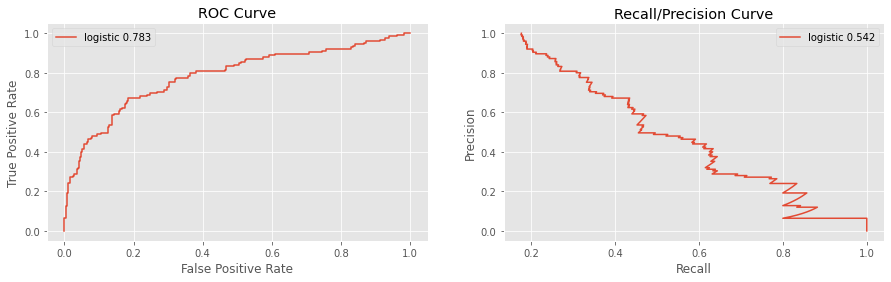

In [43]:
y = dfBS.bad
X = dfBS.drop(['bad'], axis=1)
model = LogisticRegression()

dfModel = dfModel.append(aio.modelframe(X, y, model, 'logistic'))

plt.figure(figsize=(15, 4))
aio.modelcurve(X, y, model, 'logistic')

### 6.2 Decision Tree

In [44]:
y = dfBS.bad
X = dfBS.drop(['bad'], axis=1)
model = DecisionTreeClassifier()

aio.confusion(X, y, model)

Accuracy: 0.86732 | AUC: 0.76508


,pred_0,pred_1,precision,recall,f1-score,support
0,545,46,0.918,0.922,0.920,591.000
1,49,76,0.623,0.608,0.615,125.000


In [45]:
y = dfBS.bad
X = dfBS.drop(['bad'], axis=1)
model = DecisionTreeClassifier()

dfModel = dfModel.append(aio.modelframe(X, y, model, 'tree'))
dfModel

,cross-score,cross-train,train-score,test-score,precision,recall,f1-score,auc-roc,auc-pr
logistic,0.838,0.836,0.838,0.852,0.638,0.352,0.454,0.783,0.542
tree,0.868,0.853,1.000,0.860,0.597,0.616,0.606,0.764,0.640


#### 6.2.1 Parametreler

In [46]:
dtree = DecisionTreeClassifier()
params = {'min_samples_split': [2, 4, 8, 16, 32, 48, 64], 'max_depth': [2, 4, 8, 16, 32, 48, 64], 'min_samples_leaf': [2, 8, 16, 32, 48, 64]}

In [47]:
k_fold = KFold(n_splits = 10, shuffle = True, random_state = 42)
gridcv_results = GridSearchCV(estimator = dtree, param_grid = params, cv = k_fold, n_jobs = -1, verbose = 0).fit(X, y)
gridcv_results.best_params_

{'max_depth': 16, 'min_samples_leaf': 16, 'min_samples_split': 64}

In [48]:
model = DecisionTreeClassifier(max_depth=16, min_samples_leaf=16, min_samples_split=64)

dfModel = dfModel.append(aio.modelframe(X, y, model, 'dtree_p1'))
dfModel

,cross-score,cross-train,train-score,test-score,precision,recall,f1-score,auc-roc,auc-pr
logistic,0.838,0.836,0.838,0.852,0.638,0.352,0.454,0.783,0.542
tree,0.868,0.853,1.000,0.860,0.597,0.616,0.606,0.764,0.640
dtree_p1,0.878,0.873,0.895,0.891,0.712,0.632,0.669,0.888,0.713


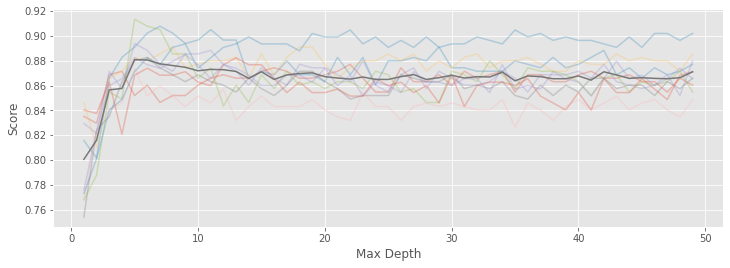

In [49]:
dtree = DecisionTreeClassifier(min_samples_leaf=2, min_samples_split=2)
params = {'max_depth': range(1,50)}

k_fold = KFold(n_splits = 10, shuffle = True, random_state = 42)
gridcv_results = GridSearchCV(estimator = dtree, param_grid = params, cv = k_fold, n_jobs = -1, verbose = 0).fit(X, y)

grid_cv = pd.DataFrame(gridcv_results.cv_results_)
grid_sort = grid_cv.sort_values(by=['param_max_depth'])

plt.figure(figsize=(12,4))
plt.plot(range(1,50), grid_sort.iloc[:,6:16], alpha=0.3)
plt.plot(range(1,50), grid_sort.iloc[:,16])
plt.xlabel('Max Depth')
plt.ylabel('Score');

In [50]:
#En iyi sonuç alınan satır düzenlenmiştir
dfModel = dfModel.drop(['tree'])
dfModel = dfModel.rename(index={'dtree_p1': 'tree'})

### 6.3 Random Forest

In [51]:
y = dfBS.bad
X = dfBS.drop(['bad'], axis=1)
model = RandomForestClassifier()

aio.confusion(X, y, model)

Accuracy: 0.92039 | AUC: 0.95304


,pred_0,pred_1,precision,recall,f1-score,support
0,577,14,0.931,0.976,0.953,591.000
1,43,82,0.854,0.656,0.742,125.000


In [52]:
y = dfBS.bad
X = dfBS.drop(['bad'], axis=1)
model = RandomForestClassifier()

dfModel = dfModel.append(aio.modelframe(X, y, model, 'forest'))
dfModel

,cross-score,cross-train,train-score,test-score,precision,recall,f1-score,auc-roc,auc-pr
logistic,0.838,0.836,0.838,0.852,0.638,0.352,0.454,0.783,0.542
tree,0.878,0.873,0.895,0.891,0.712,0.632,0.669,0.888,0.713
forest,0.911,0.905,1.000,0.911,0.835,0.608,0.704,0.951,0.848


#### 6.3.1 Parametreler

In [53]:
rforest = RandomForestClassifier()
params = {'n_estimators': np.arange(10, 200, 20), 'max_features': ['auto', 'log2']}

In [54]:
k_fold = KFold(n_splits = 10, shuffle = True, random_state = 42)
gridcv_results = GridSearchCV(estimator = rforest, param_grid = params, cv = k_fold, n_jobs = -1, verbose = 0).fit(X, y)
gridcv_results.best_params_

{'max_features': 'auto', 'n_estimators': 150}

In [55]:
model = RandomForestClassifier(max_features='auto', n_estimators=110)
dfModel = dfModel.append(aio.modelframe(X, y, model, 'forest_p1'))

In [56]:
dfModel

,cross-score,cross-train,train-score,test-score,precision,recall,f1-score,auc-roc,auc-pr
logistic,0.838,0.836,0.838,0.852,0.638,0.352,0.454,0.783,0.542
tree,0.878,0.873,0.895,0.891,0.712,0.632,0.669,0.888,0.713
forest,0.911,0.905,1.000,0.911,0.835,0.608,0.704,0.951,0.848
forest_p1,0.912,0.906,1.000,0.918,0.851,0.640,0.731,0.952,0.853


In [57]:
#En iyi sonuç alınan satır düzenlenmiştir
dfModel = dfModel.drop(['forest'])
dfModel = dfModel.rename(index={'forest_p1': 'forest'})

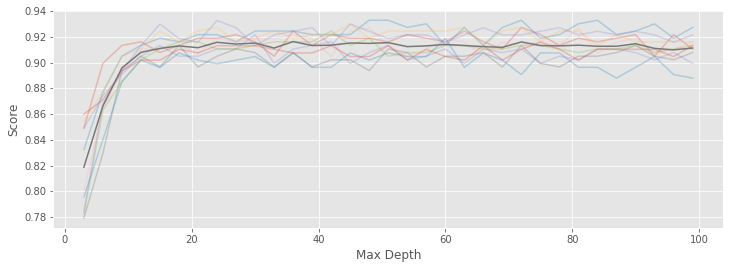

In [58]:
rforest = RandomForestClassifier()
params = {'max_depth': np.arange(0, 100, 3)}

k_fold = KFold(n_splits = 10, shuffle = True, random_state = 42)
gridcv_results = GridSearchCV(estimator = rforest, param_grid = params, cv = k_fold, n_jobs = -1, verbose = 0).fit(X, y)

grid_cv = pd.DataFrame(gridcv_results.cv_results_)
grid_sort = grid_cv.sort_values(by=['param_max_depth'])

plt.figure(figsize=(12,4))
plt.plot(np.arange(0, 100, 3), grid_sort.iloc[:,6:16], alpha=0.3)
plt.plot(np.arange(0, 100, 3), grid_sort.iloc[:,16])
plt.xlabel('Max Depth')
plt.ylabel('Score');

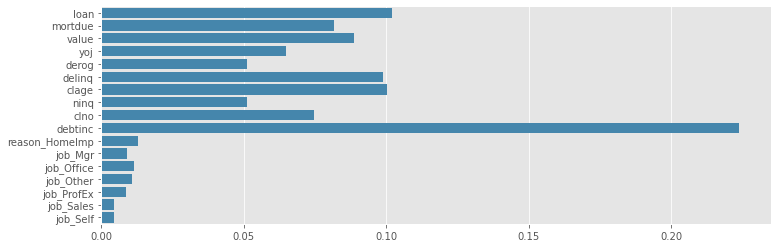

In [59]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
model = RandomForestClassifier(max_features='auto', n_estimators=110).fit(x_train, y_train)

plt.figure(figsize=(12,4))
sns.barplot(model.feature_importances_, x_train.columns, color = '#348ABD');

### 6.4 Neural Network

In [60]:
y = dfBS.bad
X = dfBS.drop(['bad'], axis=1)
model = MLPClassifier()

aio.confusion(X, y, model)

Accuracy: 0.89525 | AUC: 0.86745


,pred_0,pred_1,precision,recall,f1-score,support
0,570,21,0.913,0.964,0.938,591.000
1,54,71,0.772,0.568,0.654,125.000


In [61]:
y = dfBS.bad
X = dfBS.drop(['bad'], axis=1)
model = MLPClassifier()

dfModel = dfModel.append(aio.modelframe(X, y, model, 'neural'))

In [62]:
dfModel

,cross-score,cross-train,train-score,test-score,precision,recall,f1-score,auc-roc,auc-pr
logistic,0.838,0.836,0.838,0.852,0.638,0.352,0.454,0.783,0.542
tree,0.878,0.873,0.895,0.891,0.712,0.632,0.669,0.888,0.713
forest,0.912,0.906,1.000,0.918,0.851,0.640,0.731,0.952,0.853
neural,0.891,0.885,0.934,0.906,0.854,0.560,0.676,0.869,0.741


#### 6.4.1 Parametreler

In [63]:
neural = MLPClassifier()
params = {'hidden_layer_sizes': [(100,20),(50,20)], 'solver': ['lbfgs', 'adam', 'sgd'], 'activation': ['relu','logistic']}

In [64]:
k_fold = KFold(n_splits = 10, shuffle = True, random_state = 42)
gridcv_results = GridSearchCV(estimator = neural, param_grid = params, cv = k_fold, n_jobs = -1, verbose = 0).fit(X, y)
gridcv_results.best_params_

{'activation': 'relu', 'hidden_layer_sizes': (100, 20), 'solver': 'adam'}

In [65]:
model = MLPClassifier(hidden_layer_sizes=(100, 20), solver='adam', activation='relu')

dfModel = dfModel.append(aio.modelframe(X, y, model, 'neural_p1'))

In [66]:
dfModel

,cross-score,cross-train,train-score,test-score,precision,recall,f1-score,auc-roc,auc-pr
logistic,0.838,0.836,0.838,0.852,0.638,0.352,0.454,0.783,0.542
tree,0.878,0.873,0.895,0.891,0.712,0.632,0.669,0.888,0.713
forest,0.912,0.906,1.000,0.918,0.851,0.640,0.731,0.952,0.853
neural,0.891,0.885,0.934,0.906,0.854,0.560,0.676,0.869,0.741
neural_p1,0.906,0.906,0.997,0.920,0.854,0.656,0.742,0.879,0.786


In [67]:
#En iyi sonuç alınan satır düzenlenmiştir
dfModel = dfModel.drop(['neural'])
dfModel = dfModel.rename(index={'neural_p1': 'neural'})

### 6.5 Naive Bayes

In [68]:
y = dfBS.bad
X = dfBS.drop(['bad'], axis=1)
model = GaussianNB()

aio.confusion(X, y, model)

Accuracy: 0.80587 | AUC: 0.76995


,pred_0,pred_1,precision,recall,f1-score,support
0,523,68,0.880,0.885,0.883,591.000
1,71,54,0.443,0.432,0.437,125.000


In [69]:
y = dfBS.bad
X = dfBS.drop(['bad'], axis=1)
model = GaussianNB()

dfModel = dfModel.append(aio.modelframe(X, y, model, 'gaussian'))
dfModel

,cross-score,cross-train,train-score,test-score,precision,recall,f1-score,auc-roc,auc-pr
logistic,0.838,0.836,0.838,0.852,0.638,0.352,0.454,0.783,0.542
tree,0.878,0.873,0.895,0.891,0.712,0.632,0.669,0.888,0.713
forest,0.912,0.906,1.000,0.918,0.851,0.640,0.731,0.952,0.853
neural,0.906,0.906,0.997,0.920,0.854,0.656,0.742,0.879,0.786
gaussian,0.794,0.790,0.792,0.806,0.443,0.432,0.437,0.770,0.462


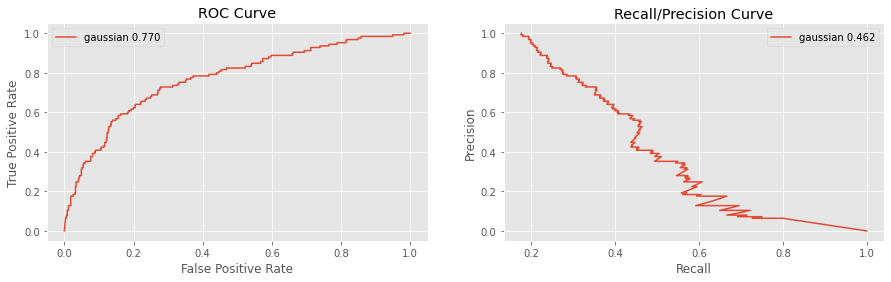

In [70]:
plt.figure(figsize=(15, 4))
aio.modelcurve(X, y, model, 'gaussian')

### 6.6 Support Vector Machine

In [71]:
y = dfBS.bad
X = dfBS.drop(['bad'], axis=1)
model = SVC(kernel='linear', probability=True)

aio.confusion(X, y, model)

Accuracy: 0.84218 | AUC: 0.79135


,pred_0,pred_1,precision,recall,f1-score,support
0,575,16,0.856,0.973,0.911,591.000
1,97,28,0.636,0.224,0.331,125.000


In [72]:
y = dfBS.bad
X = dfBS.drop(['bad'], axis=1)
model = SVC(kernel='linear', probability=True)

dfModel = dfModel.append(aio.modelframe(X, y, model, 'support'))
dfModel

,cross-score,cross-train,train-score,test-score,precision,recall,f1-score,auc-roc,auc-pr
logistic,0.838,0.836,0.838,0.852,0.638,0.352,0.454,0.783,0.542
tree,0.878,0.873,0.895,0.891,0.712,0.632,0.669,0.888,0.713
forest,0.912,0.906,1.000,0.918,0.851,0.640,0.731,0.952,0.853
neural,0.906,0.906,0.997,0.920,0.854,0.656,0.742,0.879,0.786
gaussian,0.794,0.790,0.792,0.806,0.443,0.432,0.437,0.770,0.462
support,0.834,0.831,0.832,0.842,0.636,0.224,0.331,0.791,0.526


#### 6.6.1 Parametreler

In [73]:
svc = SVC(probability=True)
params = {'C': [0.1, 1, 5, 10], 'kernel':['linear', 'rbf', 'poly']}

In [74]:
k_fold = KFold(n_splits = 10, shuffle = True, random_state = 42)
gridcv_results = GridSearchCV(estimator = svc, param_grid = params, cv = k_fold, n_jobs = -1, verbose = 0).fit(X, y)
gridcv_results.best_params_

{'C': 10, 'kernel': 'rbf'}

In [75]:
model = SVC(kernel='rbf', C=10, probability=True)
dfModel = dfModel.append(aio.modelframe(X, y, model, 'support_p1'))
dfModel

,cross-score,cross-train,train-score,test-score,precision,recall,f1-score,auc-roc,auc-pr
logistic,0.838,0.836,0.838,0.852,0.638,0.352,0.454,0.783,0.542
tree,0.878,0.873,0.895,0.891,0.712,0.632,0.669,0.888,0.713
forest,0.912,0.906,1.000,0.918,0.851,0.640,0.731,0.952,0.853
neural,0.906,0.906,0.997,0.920,0.854,0.656,0.742,0.879,0.786
gaussian,0.794,0.790,0.792,0.806,0.443,0.432,0.437,0.770,0.462
support,0.834,0.831,0.832,0.842,0.636,0.224,0.331,0.791,0.526
support_p1,0.907,0.899,0.952,0.912,0.908,0.552,0.687,0.906,0.817


In [76]:
#En iyi sonuç alınan satır düzenlenmiştir
dfModel = dfModel.drop(['support'])
dfModel = dfModel.rename(index={'support_p1': 'support'})

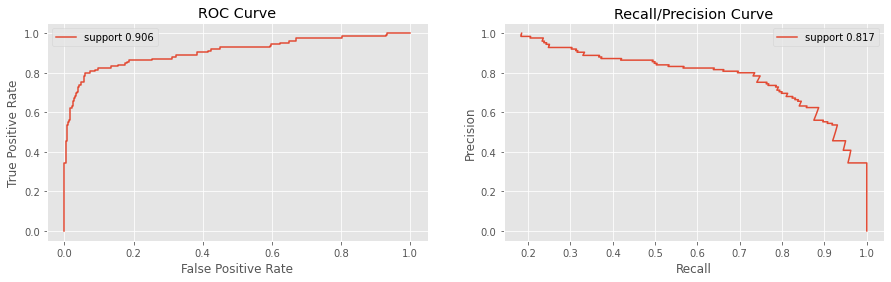

In [77]:
model = SVC(kernel='rbf', C=10, probability=True)

plt.figure(figsize=(15, 4))
aio.modelcurve(X, y, model, 'support')

### 6.7 LightGBM

In [78]:
y = dfBS.bad
X = dfBS.drop(['bad'], axis=1)
model = LGBMClassifier()

aio.confusion(X, y, model)

Accuracy: 0.90922 | AUC: 0.93512


,pred_0,pred_1,precision,recall,f1-score,support
0,570,21,0.928,0.964,0.946,591.000
1,44,81,0.794,0.648,0.714,125.000


In [79]:
y = dfBS.bad
X = dfBS.drop(['bad'], axis=1)
model = LGBMClassifier()

dfModel = dfModel.append(aio.modelframe(X, y, model, 'lightgbm'))
dfModel

,cross-score,cross-train,train-score,test-score,precision,recall,f1-score,auc-roc,auc-pr
logistic,0.838,0.836,0.838,0.852,0.638,0.352,0.454,0.783,0.542
tree,0.878,0.873,0.895,0.891,0.712,0.632,0.669,0.888,0.713
forest,0.912,0.906,1.000,0.918,0.851,0.640,0.731,0.952,0.853
neural,0.906,0.906,0.997,0.920,0.854,0.656,0.742,0.879,0.786
gaussian,0.794,0.790,0.792,0.806,0.443,0.432,0.437,0.770,0.462
support,0.907,0.899,0.952,0.912,0.908,0.552,0.687,0.906,0.817
lightgbm,0.909,0.909,0.998,0.909,0.794,0.648,0.714,0.935,0.824


#### 6.7.1 Parametreler

In [80]:
lightgbm = LGBMClassifier()
params = {'learning_rate':[0.01,0.1,0.3],'n_estimators':[50,100,300],'max_depth':[3,5,10],'min_child_weight':[2,5,10],'subsample':[0.6,0.8,1.0]}

In [81]:
k_fold = KFold(n_splits = 10, shuffle = True, random_state = 42)
gridcv_results = GridSearchCV(estimator = lightgbm, param_grid = params, cv = k_fold, n_jobs = -1, verbose = 0).fit(X, y)
gridcv_results.best_params_

{'learning_rate': 0.3,
 'max_depth': 10,
 'min_child_weight': 2,
 'n_estimators': 300,
 'subsample': 0.6}

In [82]:
model = LGBMClassifier(learning_rate=0.3, max_depth=10, min_child_weight=2, n_estimators=300, subsample=0.6)
dfModel = dfModel.append(aio.modelframe(X, y, model, 'lightgbm_p1'))
dfModel

,cross-score,cross-train,train-score,test-score,precision,recall,f1-score,auc-roc,auc-pr
logistic,0.838,0.836,0.838,0.852,0.638,0.352,0.454,0.783,0.542
tree,0.878,0.873,0.895,0.891,0.712,0.632,0.669,0.888,0.713
forest,0.912,0.906,1.000,0.918,0.851,0.640,0.731,0.952,0.853
neural,0.906,0.906,0.997,0.920,0.854,0.656,0.742,0.879,0.786
gaussian,0.794,0.790,0.792,0.806,0.443,0.432,0.437,0.770,0.462
support,0.907,0.899,0.952,0.912,0.908,0.552,0.687,0.906,0.817
lightgbm,0.909,0.909,0.998,0.909,0.794,0.648,0.714,0.935,0.824
lightgbm_p1,0.913,0.908,1.000,0.916,0.788,0.712,0.748,0.941,0.823


In [83]:
#En iyi sonuç alınan satır düzenlenmiştir
dfModel = dfModel.drop(['lightgbm'])
dfModel = dfModel.rename(index={'lightgbm_p1': 'lightgbm'})

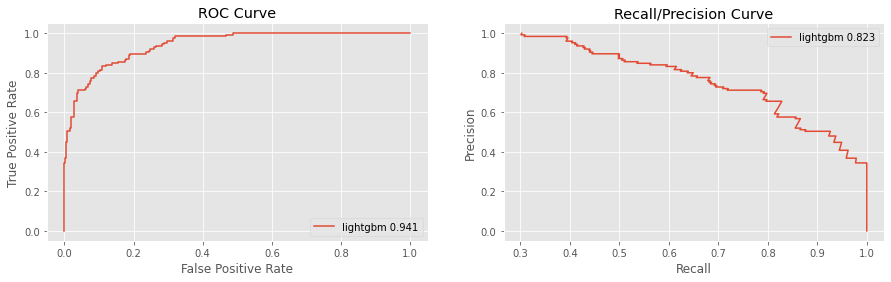

In [84]:
model = LGBMClassifier(learning_rate=0.3, max_depth=10, min_child_weight=2, n_estimators=300, subsample=0.6)

plt.figure(figsize=(15, 4))
aio.modelcurve(X, y, model, 'lightgbm')

### 6.8 k-Nearest Neighbors

In [85]:
y = dfBS.bad
X = dfBS.drop(['bad'], axis=1)
model = KNeighborsClassifier()

aio.confusion(X, y, model)

Accuracy: 0.88687 | AUC: 0.83985


,pred_0,pred_1,precision,recall,f1-score,support
0,584,7,0.888,0.988,0.935,591.000
1,74,51,0.879,0.408,0.557,125.000


In [86]:
y = dfBS.bad
X = dfBS.drop(['bad'], axis=1)
model = KNeighborsClassifier()

dfModel = dfModel.append(aio.modelframe(X, y, model, 'knn'))
dfModel

,cross-score,cross-train,train-score,test-score,precision,recall,f1-score,auc-roc,auc-pr
logistic,0.838,0.836,0.838,0.852,0.638,0.352,0.454,0.783,0.542
tree,0.878,0.873,0.895,0.891,0.712,0.632,0.669,0.888,0.713
forest,0.912,0.906,1.000,0.918,0.851,0.640,0.731,0.952,0.853
neural,0.906,0.906,0.997,0.920,0.854,0.656,0.742,0.879,0.786
gaussian,0.794,0.790,0.792,0.806,0.443,0.432,0.437,0.770,0.462
support,0.907,0.899,0.952,0.912,0.908,0.552,0.687,0.906,0.817
lightgbm,0.913,0.908,1.000,0.916,0.788,0.712,0.748,0.941,0.823
knn,0.877,0.866,0.912,0.887,0.879,0.408,0.557,0.840,0.716


#### 6.8.1 Parametreler

In [87]:
knn = KNeighborsClassifier()
params = {'metric' : ['euclidean','manhattan','chebyshev','minkowski'], 'weights' : ['uniform','distance'], 'n_neighbors' : np.arange(10, 60, 5)}

In [88]:
k_fold = KFold(n_splits = 10, shuffle = True, random_state = 42)
gridcv_results = GridSearchCV(estimator = knn, param_grid = params, cv = k_fold, n_jobs = -1, verbose = 0).fit(X, y)
gridcv_results.best_params_

{'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'distance'}

In [89]:
model = KNeighborsClassifier(metric='euclidean', weights='distance', n_neighbors=10)
dfModel = dfModel.append(aio.modelframe(X, y, model, 'knn_p1'))
dfModel

,cross-score,cross-train,train-score,test-score,precision,recall,f1-score,auc-roc,auc-pr
logistic,0.838,0.836,0.838,0.852,0.638,0.352,0.454,0.783,0.542
tree,0.878,0.873,0.895,0.891,0.712,0.632,0.669,0.888,0.713
forest,0.912,0.906,1.000,0.918,0.851,0.640,0.731,0.952,0.853
neural,0.906,0.906,0.997,0.920,0.854,0.656,0.742,0.879,0.786
gaussian,0.794,0.790,0.792,0.806,0.443,0.432,0.437,0.770,0.462
support,0.907,0.899,0.952,0.912,0.908,0.552,0.687,0.906,0.817
lightgbm,0.913,0.908,1.000,0.916,0.788,0.712,0.748,0.941,0.823
knn,0.877,0.866,0.912,0.887,0.879,0.408,0.557,0.840,0.716
knn_p1,0.873,0.867,1.000,0.890,0.979,0.376,0.543,0.858,0.759


In [90]:
#En iyi sonuç alınan satır düzenlenmiştir
dfModel = dfModel.drop(['knn_p1'])

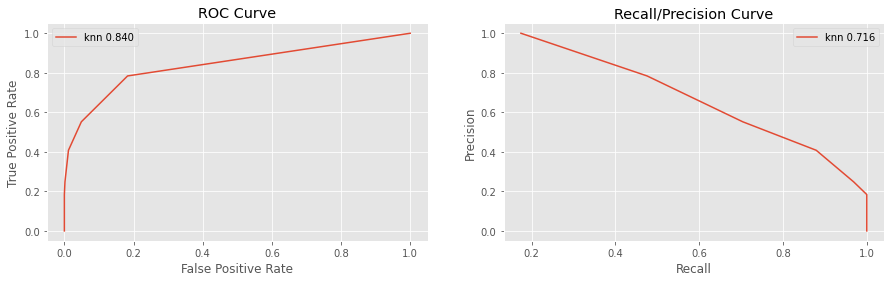

In [91]:
model = KNeighborsClassifier()

plt.figure(figsize=(15, 4))
aio.modelcurve(X, y, model, 'knn')

## 7. SONUÇ

In [92]:
dfModel

,cross-score,cross-train,train-score,test-score,precision,recall,f1-score,auc-roc,auc-pr
logistic,0.838,0.836,0.838,0.852,0.638,0.352,0.454,0.783,0.542
tree,0.878,0.873,0.895,0.891,0.712,0.632,0.669,0.888,0.713
forest,0.912,0.906,1.000,0.918,0.851,0.640,0.731,0.952,0.853
neural,0.906,0.906,0.997,0.920,0.854,0.656,0.742,0.879,0.786
gaussian,0.794,0.790,0.792,0.806,0.443,0.432,0.437,0.770,0.462
support,0.907,0.899,0.952,0.912,0.908,0.552,0.687,0.906,0.817
lightgbm,0.913,0.908,1.000,0.916,0.788,0.712,0.748,0.941,0.823
knn,0.877,0.866,0.912,0.887,0.879,0.408,0.557,0.840,0.716


In [115]:
model = LGBMClassifier(learning_rate=0.3, max_depth=10, min_child_weight=2, n_estimators=300, subsample=0.6)
aio.confusion(X, y, model)

Accuracy: 0.91620 | AUC: 0.94070


,pred_0,pred_1,precision,recall,f1-score,support
0,567,24,0.940,0.959,0.950,591.000
1,36,89,0.788,0.712,0.748,125.000


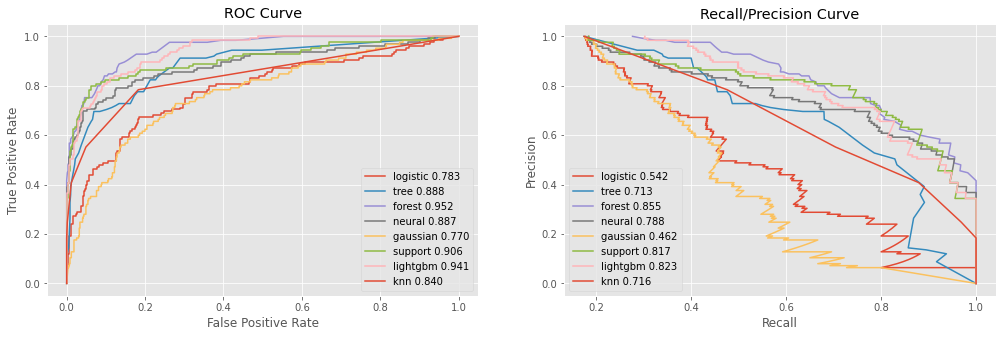

In [93]:
plt.figure(figsize=(17, 5))

model = LogisticRegression()
aio.modelcurve(X, y, model, 'logistic')

model = DecisionTreeClassifier(max_depth=16, min_samples_leaf=16, min_samples_split=64)
aio.modelcurve(X, y, model, 'tree')

model = RandomForestClassifier(n_estimators=110)
aio.modelcurve(X, y, model, 'forest')

model = MLPClassifier(hidden_layer_sizes=(100, 20), solver='adam')
aio.modelcurve(X, y, model, 'neural')

model = GaussianNB()
aio.modelcurve(X, y, model, 'gaussian')

model = SVC(kernel='rbf', C=10, probability=True)
aio.modelcurve(X, y, model, 'support')

model = LGBMClassifier(learning_rate=0.3, max_depth=10, min_child_weight=2, n_estimators=300, subsample=0.6)
aio.modelcurve(X, y, model, 'lightgbm')

model = KNeighborsClassifier()
aio.modelcurve(X, y, model, 'knn')

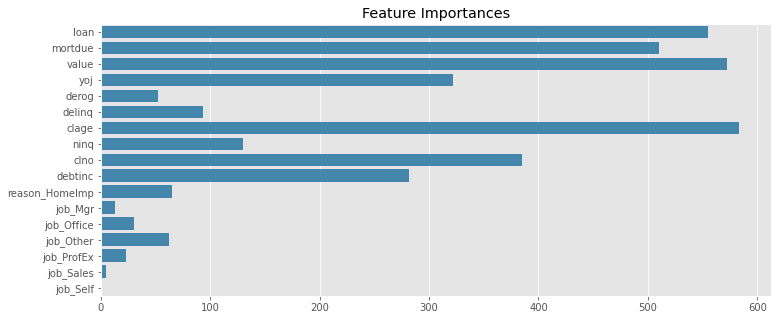

In [114]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
model = LGBMClassifier(learning_rate=0.3, max_depth=10, min_child_weight=2, n_estimators=300, subsample=0.6).fit(x_train,y_train)

plt.figure(figsize=(12,5))
sns.barplot(model.feature_importances_, x_train.columns, color = '#348ABD')
plt.title('Feature Importances');